In [1]:
print("Tutorial Question 10/21")

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Tutorial Question 10/21


2022-10-25 13:43:47.456234: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
/home/hojun/miniconda3/envs/tensor/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


2.4.1


In [2]:
# Load dataset
cifar10 = keras.datasets.cifar10

print(cifar10)

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

<module 'tensorflow.keras.datasets.cifar10' from '/home/hojun/miniconda3/envs/tensor/lib/python3.9/site-packages/tensorflow/keras/datasets/cifar10/__init__.py'>
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
class_names =  ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

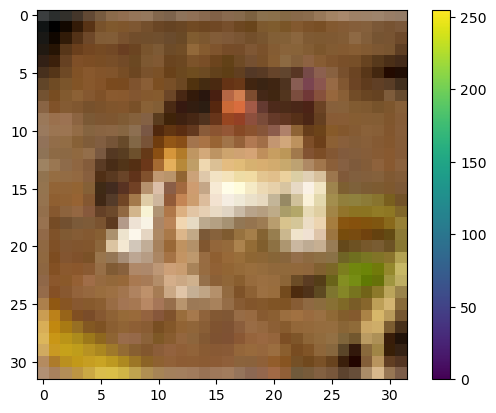

In [4]:
# Cifar10 example
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

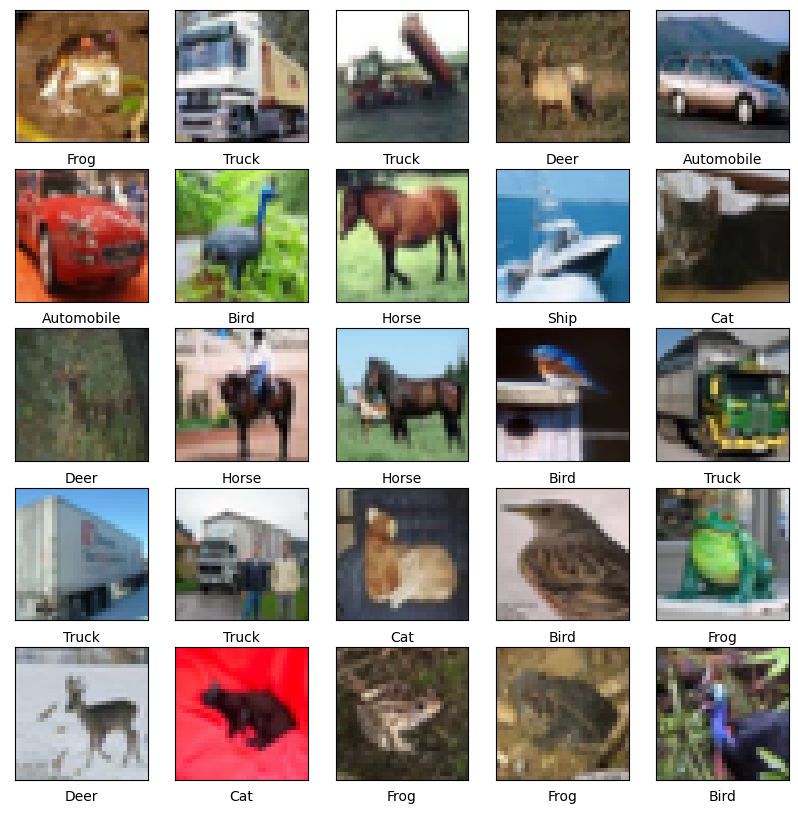

In [6]:
# Show images and labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [7]:
# For logging
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    self.epoch_val_acc = []
    
  def on_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['accuracy'])
   
  def on_epoch_end(self, epoch, logs=None):
    self.epoch_val_acc.append(logs['val_accuracy'])
    
    
def scheduler(epoch, lr):
  """Helper function to retrieve the scheduled learning rate based on epoch."""
  if epoch == 40 or epoch ==60 : 
    lr = lr  * 0.1
  else:
    lr = lr
  return lr

<a href="https://ibb.co/6Y82nPk"><img src="https://i.ibb.co/cJwPgFj/fc.png" alt="fc" border="0"></a>

In [8]:
# Fully connected network without ReLU
fc_without_relu_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(28*28*8),
    keras.layers.Dense(24*24*8),
    keras.layers.Reshape((24, 24, 8)),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(8*8*16),
    keras.layers.Dense(4*4*16),
    keras.layers.Reshape((4, 4, 16)),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
fc_without_relu_model.summary()

2022-10-25 13:44:06.919480: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-25 13:44:06.925986: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-10-25 13:44:07.181323: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-25 13:44:07.181369: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: NVIDIA GeForce RTX 3070 computeCapability: 8.6
coreClock: 1.77GHz coreCount: 46 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2022-10-25 13:44:07.181777: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 6272)              19273856  
_________________________________________________________________
dense_1 (Dense)              (None, 4608)              28905984  
_________________________________________________________________
reshape (Reshape)            (None, 24, 24, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1

In [9]:
# Compile fully connected network without ReLU
fc_without_relu_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy']
)

In [10]:
# Train fully connected network without ReLU
fc_without_relu_batch_stats = CollectBatchStats()

fc_without_relu_model.fit(train_images, train_labels,
             batch_size=128,
             epochs=70,
             callbacks=[fc_without_relu_batch_stats, tf.keras.callbacks.LearningRateScheduler(scheduler)],
             validation_data=(test_images, test_labels))

2022-10-25 13:50:30.877710: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-10-25 13:50:30.878183: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3400000000 Hz


Epoch 1/70


2022-10-25 13:50:31.202127: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-10-25 13:52:31.942008: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


KeyboardInterrupt: 

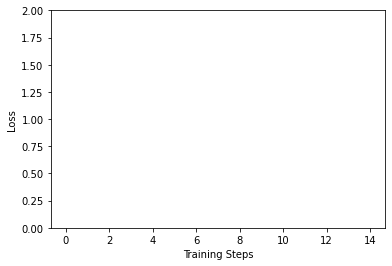

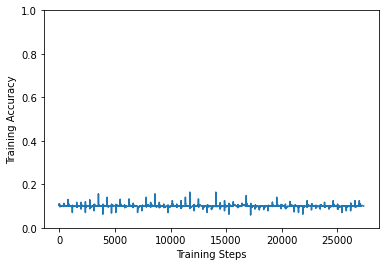

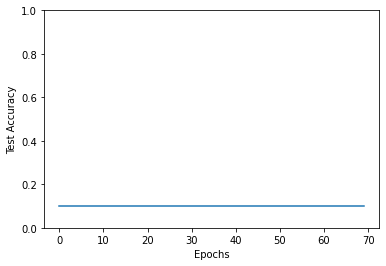

In [10]:
# show train losses, train accuracy, test accuracy
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(fc_without_relu_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(fc_without_relu_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(fc_without_relu_batch_stats.epoch_val_acc)

In [11]:
# Fully connected network
fc_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(28*28*8, activation=tf.nn.relu),
    keras.layers.Dense(24*24*8, activation=tf.nn.relu),
    keras.layers.Reshape((24, 24, 8)),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(8*8*16, activation=tf.nn.relu),
    keras.layers.Dense(4*4*16, activation=tf.nn.relu),
    keras.layers.Reshape((4, 4, 16)),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
fc_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 6272)              19273856  
                                                                 
 dense_6 (Dense)             (None, 4608)              28905984  
                                                                 
 reshape_2 (Reshape)         (None, 24, 24, 8)         0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1152)              0         
                                                      

In [12]:
# Compile fully connected network
fc_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy']
)

In [13]:
# Train fully connected network
fc_batch_stats = CollectBatchStats()

fc_model.fit(train_images, train_labels,
             batch_size=128,
             epochs=70,
             callbacks=[fc_batch_stats, tf.keras.callbacks.LearningRateScheduler(scheduler)],
             validation_data=(test_images, test_labels))

Epoch 1/70
  4/391 [..............................] - ETA: 8s - loss: 2.3305 - accuracy: 0.1426  

391/391 [==============================] - 7s 18ms/step - loss: 1.7998 - accuracy: 0.3516 - val_loss: 1.6660 - val_accuracy: 0.4084 - lr: 0.0100
Epoch 2/70
391/391 [==============================] - 7s 17ms/step - loss: 1.6025 - accuracy: 0.4259 - val_loss: 1.6011 - val_accuracy: 0.4302 - lr: 0.0100
Epoch 3/70
391/391 [==============================] - 7s 17ms/step - loss: 1.5275 - accuracy: 0.4531 - val_loss: 1.4721 - val_accuracy: 0.4689 - lr: 0.0100
Epoch 4/70
391/391 [==============================] - 7s 17ms/step - loss: 1.4612 - accuracy: 0.4763 - val_loss: 1.4569 - val_accuracy: 0.4853 - lr: 0.0100
Epoch 5/70
391/391 [==============================] - 7s 17ms/step - loss: 1.4013 - accuracy: 0.5003 - val_loss: 1.4159 - val_accuracy: 0.4922 - lr: 0.0100
Epoch 6/70
391/391 [==============================] - 7s 17ms/step - loss: 1.3554 - accuracy: 0.5153 - val_loss: 1.4040 - val_accuracy: 0.5054 - lr: 0.0100
Epoch 7/70
391/391 [==============================] - 7s 17ms/step - loss: 

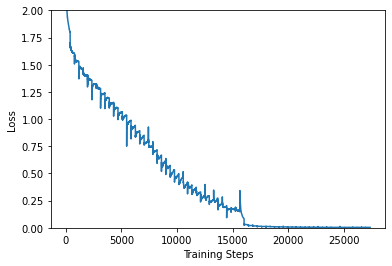

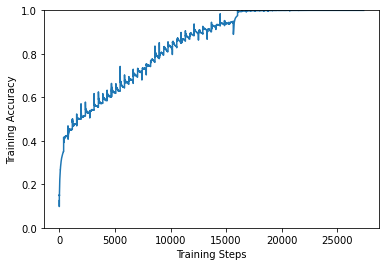

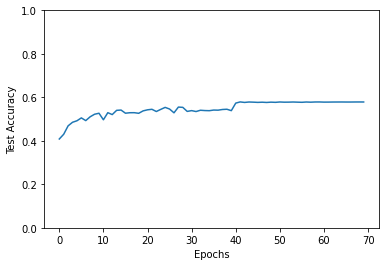

In [14]:
# show train losses, train accuracy, test accuracy
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(fc_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(fc_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(fc_batch_stats.epoch_val_acc)

<a href="https://ibb.co/ZdYWYxN"><img src="https://i.ibb.co/Tcbmbtr/cnn.png" alt="cnn" border="0"></a>

In [8]:
# Convolutional neural network
cnn_model = keras.Sequential([
    keras.layers.Conv2D(filters=8, kernel_size=5, activation=tf.nn.relu, input_shape=(32, 32, 3)),
    keras.layers.Conv2D(filters=8, kernel_size=5, activation=tf.nn.relu),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(16, 5, activation=tf.nn.relu),
    keras.layers.Conv2D(16, 5, activation=tf.nn.relu),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
cnn_model.summary()

# Compile CNN model
cnn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

cnn_batch_stats = CollectBatchStats()

# Train CNN model
cnn_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=70,
              callbacks=[cnn_batch_stats, tf.keras.callbacks.LearningRateScheduler(scheduler)],
              validation_data=(test_images, test_labels))

plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(cnn_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Train Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(cnn_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(cnn_batch_stats.epoch_val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.1488 - accuracy: 0.6273
fc test accuracy : 0.5785999894142151
cnn test accuracy : 0.6273000240325928


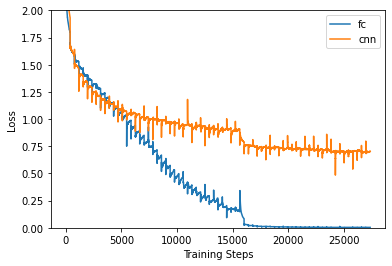

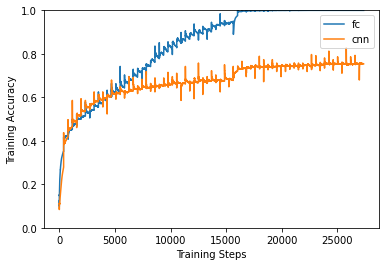

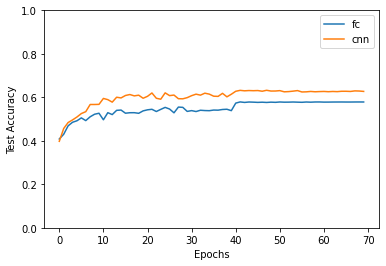

In [32]:
# Compare fully-connected network and CNN network
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(fc_batch_stats.batch_losses, label='fc')
plt.plot(cnn_batch_stats.batch_losses, label='cnn')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(fc_batch_stats.batch_acc, label='fc')
plt.plot(cnn_batch_stats.batch_acc, label='cnn')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(fc_batch_stats.epoch_val_acc, label='fc')
plt.plot(cnn_batch_stats.epoch_val_acc, label='cnn')
plt.legend(loc='upper right')

fc_test_loss, fc_test_acc = fc_model.evaluate(test_images, test_labels)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images, test_labels)

print('fc test accuracy : ' + str(fc_test_acc))
print('cnn test accuracy : ' + str(cnn_test_acc))

<a href="https://ibb.co/3fw8kGR"><img src="https://i.ibb.co/yhDMVG4/vgg.png" alt="vgg" border="0"></a>

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 re_lu (ReLU)                (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 re_lu_1 (ReLU)              (None, 32, 32, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 re_lu_2 (ReLU)              (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)      

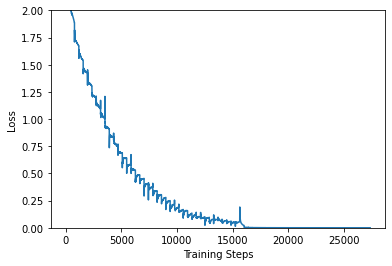

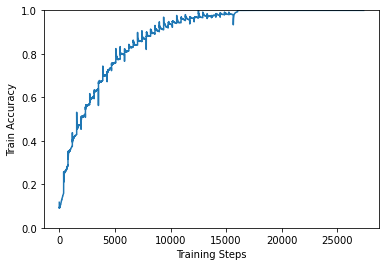

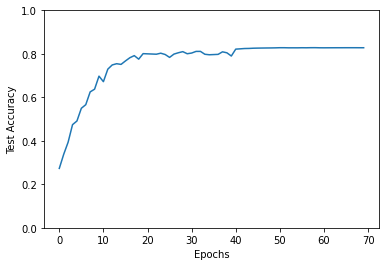

In [17]:
# VGG network
vgg_model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', input_shape=(32, 32, 3)),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.AveragePooling2D(pool_size=(8, 8)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
vgg_model.summary()

vgg_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

vgg_batch_stats = CollectBatchStats()

vgg_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=70,
              callbacks=[vgg_batch_stats, tf.keras.callbacks.LearningRateScheduler(scheduler)],
              validation_data=(test_images, test_labels))

plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(vgg_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Train Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(vgg_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(vgg_batch_stats.epoch_val_acc)


vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_images, test_labels)
print('VGG test accuracy : ' + str(vgg_test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 1.6717 - accuracy: 0.8019
simple cnn test accuracy : 0.6208999752998352
vgg test accuracy : 0.8019000291824341


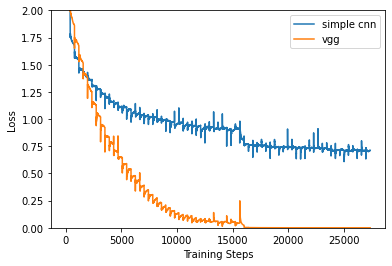

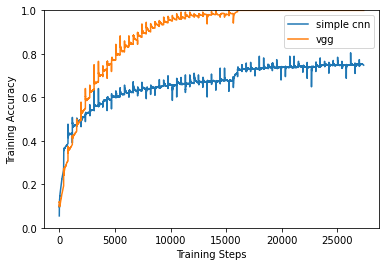

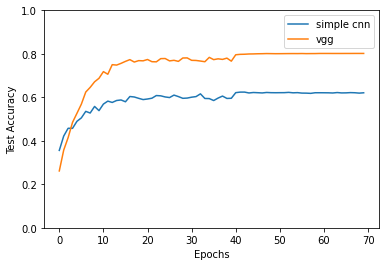

In [ ]:
# Compare simple CNN network and VGG network
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(cnn_batch_stats.batch_losses, label='simple cnn')
plt.plot(vgg_batch_stats.batch_losses, label='vgg')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(cnn_batch_stats.batch_acc, label='simple cnn')
plt.plot(vgg_batch_stats.batch_acc, label='vgg')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(cnn_batch_stats.epoch_val_acc, label='simple cnn')
plt.plot(vgg_batch_stats.epoch_val_acc, label='vgg')
plt.legend(loc='upper right')

cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images, test_labels)
vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_images, test_labels)

print('simple cnn test accuracy : ' + str(cnn_test_acc))
print('vgg test accuracy : ' + str(vgg_test_acc))

<a href="https://ibb.co/YBT4Bx3"><img src="https://i.ibb.co/4RgwRH7/resnet.png" alt="resnet" border="0"></a>

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_13 (Conv2D)             (None, 32, 32, 32)   896         ['input_1[0][0]']                
                                                                                                  
 re_lu_9 (ReLU)                 (None, 32, 32, 32)   0           ['conv2d_13[0][0]']              
                                                                                                  
 conv2d_14 (Conv2D)             (None, 32, 32, 32)   9248        ['re_lu_9[0][0]']                
                                                                                              

391/391 [==============================] - 9s 22ms/step - loss: 2.0240 - accuracy: 0.2431 - val_loss: 1.7627 - val_accuracy: 0.3571 - lr: 0.0100
Epoch 2/70
391/391 [==============================] - 8s 21ms/step - loss: 1.7062 - accuracy: 0.3634 - val_loss: 1.6084 - val_accuracy: 0.4140 - lr: 0.0100
Epoch 3/70
391/391 [==============================] - 8s 21ms/step - loss: 1.4980 - accuracy: 0.4501 - val_loss: 1.3713 - val_accuracy: 0.5056 - lr: 0.0100
Epoch 4/70
391/391 [==============================] - 8s 21ms/step - loss: 1.3373 - accuracy: 0.5116 - val_loss: 1.2246 - val_accuracy: 0.5433 - lr: 0.0100
Epoch 5/70
391/391 [==============================] - 8s 21ms/step - loss: 1.1656 - accuracy: 0.5814 - val_loss: 1.0615 - val_accuracy: 0.6249 - lr: 0.0100
Epoch 6/70
391/391 [==============================] - 8s 21ms/step - loss: 1.0448 - accuracy: 0.6279 - val_loss: 1.0423 - val_accuracy: 0.6208 - lr: 0.0100
Epoch 7/70
391/391 [==============================] - 8s 21ms/step - loss: 

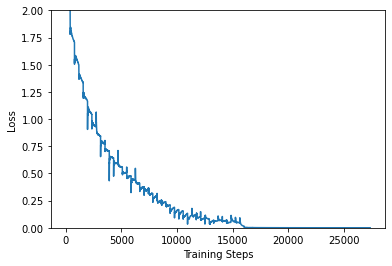

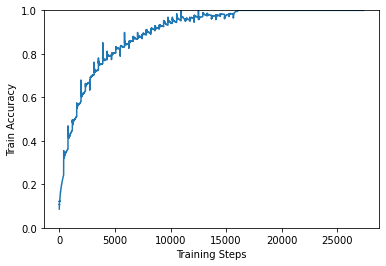

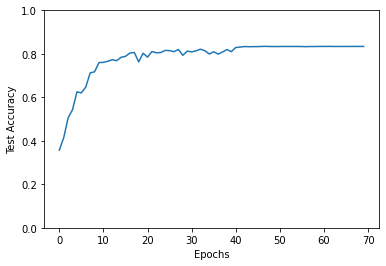

In [18]:
# Residual network
input = keras.layers.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1))(input)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.AveragePooling2D(pool_size=(8, 8))(x)
x = keras.layers.Flatten()(x)
output = keras.layers.Dense(10, activation=tf.nn.softmax)(x)

resnet_model = keras.models.Model(input, output)
resnet_model.summary()

resnet_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

resnet_batch_stats = CollectBatchStats()

resnet_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=70,
              callbacks=[resnet_batch_stats, tf.keras.callbacks.LearningRateScheduler(scheduler)],
              validation_data=(test_images, test_labels))

plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(resnet_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Train Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(resnet_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(resnet_batch_stats.epoch_val_acc)

resnet_test_loss, resnet_test_acc = resnet_model.evaluate(test_images, test_labels)
print('Resnet test accuracy : ' + str(resnet_test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 1.3055 - accuracy: 0.8341
vgg test accuracy : 0.8281000256538391
resnet test accuracy : 0.8341000080108643


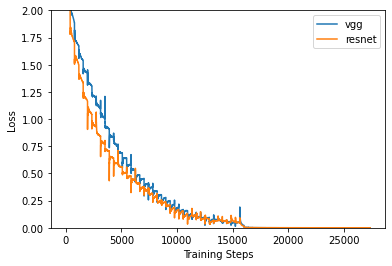

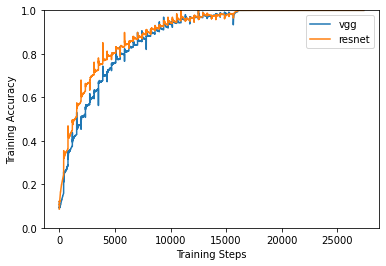

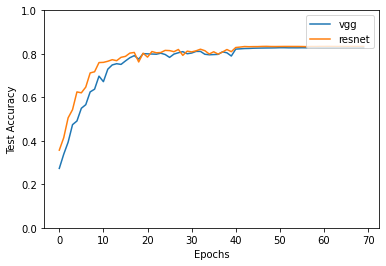

In [19]:
# Compare VGG network and Residual network
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(vgg_batch_stats.batch_losses, label='vgg')
plt.plot(resnet_batch_stats.batch_losses, label='resnet')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(vgg_batch_stats.batch_acc, label='vgg')
plt.plot(resnet_batch_stats.batch_acc, label='resnet')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(vgg_batch_stats.epoch_val_acc, label='vgg')
plt.plot(resnet_batch_stats.epoch_val_acc, label='resnet')
plt.legend(loc='upper right')

vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_images, test_labels)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(test_images, test_labels)

print('vgg test accuracy : ' + str(vgg_test_acc))
print('resnet test accuracy : ' + str(resnet_test_acc))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 re_lu_54 (ReLU)             (None, 32, 32, 16)        0         
                                                                 
 conv2d_59 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 re_lu_55 (ReLU)             (None, 32, 32, 16)        0         
                                                                 
 conv2d_60 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 re_lu_56 (ReLU)             (None, 32, 32, 16)        0         
                                                                 
 conv2d_61 (Conv2D)          (None, 32, 32, 16)       

391/391 [==============================] - 8s 18ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0100
Epoch 2/70
391/391 [==============================] - 7s 17ms/step - loss: 2.3028 - accuracy: 0.0974 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0100
Epoch 3/70
391/391 [==============================] - 7s 17ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000 - lr: 0.0100
Epoch 4/70
391/391 [==============================] - 7s 17ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000 - lr: 0.0100
Epoch 5/70
391/391 [==============================] - 7s 17ms/step - loss: 2.3028 - accuracy: 0.0970 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0100
Epoch 6/70
391/391 [==============================] - 7s 17ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000 - lr: 0.0100
Epoch 7/70
391/391 [==============================] - 7s 17ms/step - loss: 

391/391 [==============================] - 8s 18ms/step - loss: 2.2624 - accuracy: 0.1260 - val_loss: 2.1000 - val_accuracy: 0.1639 - lr: 0.0100
Epoch 2/70
391/391 [==============================] - 7s 18ms/step - loss: 1.9431 - accuracy: 0.2373 - val_loss: 1.8368 - val_accuracy: 0.3087 - lr: 0.0100
Epoch 3/70
391/391 [==============================] - 7s 17ms/step - loss: 1.7666 - accuracy: 0.3280 - val_loss: 1.7041 - val_accuracy: 0.3725 - lr: 0.0100
Epoch 4/70
391/391 [==============================] - 7s 18ms/step - loss: 1.6461 - accuracy: 0.3836 - val_loss: 1.5956 - val_accuracy: 0.3985 - lr: 0.0100
Epoch 5/70
391/391 [==============================] - 7s 18ms/step - loss: 1.5196 - accuracy: 0.4363 - val_loss: 1.4888 - val_accuracy: 0.4529 - lr: 0.0100
Epoch 6/70
391/391 [==============================] - 7s 18ms/step - loss: 1.4070 - accuracy: 0.4824 - val_loss: 1.3960 - val_accuracy: 0.4801 - lr: 0.0100
Epoch 7/70
391/391 [==============================] - 7s 18ms/step - loss: 

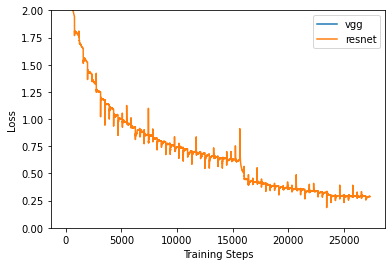

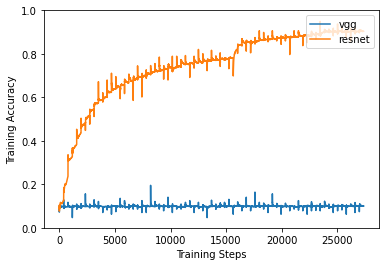

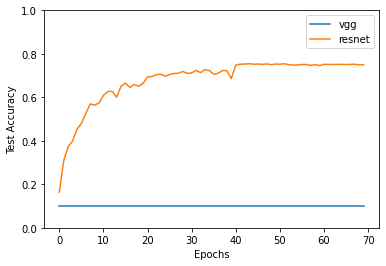

In [21]:
# VGG network very deep
vgg_very_deep_model = keras.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same', input_shape=(32, 32, 3)),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    
    keras.layers.MaxPool2D(2),
    
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    
    keras.layers.MaxPool2D(2),
    
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same'),
    keras.layers.ReLU(),

    keras.layers.AveragePooling2D(pool_size=(8, 8)),

    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
vgg_very_deep_model.summary()

vgg_very_deep_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

vgg_very_deep_batch_stats = CollectBatchStats()

vgg_very_deep_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=70,
              callbacks=[vgg_very_deep_batch_stats, tf.keras.callbacks.LearningRateScheduler(scheduler)],
              validation_data=(test_images, test_labels))

# Residual network very deep
input = keras.layers.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(input)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)

x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)

x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(16, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)

x = keras.layers.AveragePooling2D(pool_size=(8, 8))(x)
x = keras.layers.Flatten()(x)

output = keras.layers.Dense(10, activation=tf.nn.softmax)(x)

resnet_very_deep_model = keras.models.Model(input, output)
resnet_very_deep_model.summary()

resnet_very_deep_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

resnet_very_deep_batch_stats = CollectBatchStats()

resnet_very_deep_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=70,
              callbacks=[resnet_very_deep_batch_stats, tf.keras.callbacks.LearningRateScheduler(scheduler)],
              validation_data=(test_images, test_labels))

# Compare VGG very deep network and Residual very deep network
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(vgg_very_deep_batch_stats.batch_losses, label='vgg')
plt.plot(resnet_very_deep_batch_stats.batch_losses, label='resnet')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(vgg_very_deep_batch_stats.batch_acc, label='vgg')
plt.plot(resnet_very_deep_batch_stats.batch_acc, label='resnet')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(vgg_very_deep_batch_stats.epoch_val_acc, label='vgg')
plt.plot(resnet_very_deep_batch_stats.epoch_val_acc, label='resnet')
plt.legend(loc='upper right')

vgg_very_deep_test_loss, vgg_very_deep_test_acc = vgg_very_deep_model.evaluate(test_images, test_labels)
resnet_very_deep_test_loss, resnet_very_deep_test_acc = resnet_very_deep_model.evaluate(test_images, test_labels)

print('vgg very deep test accuracy : ' + str(vgg_very_deep_test_acc))
print('resnet very deep test accuracy : ' + str(resnet_very_deep_test_acc))

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_58 (Conv2D)              (None, 32, 32, 32)   896         input_3[0][0]                    
__________________________________________________________________________________________________
re_lu_54 (ReLU)                 (None, 32, 32, 32)   0           conv2d_58[0][0]                  
__________________________________________________________________________________________________
conv2d_59 (Conv2D)              (None, 32, 32, 32)   9248        re_lu_54[0][0]                   
____________________________________________________________________________________________

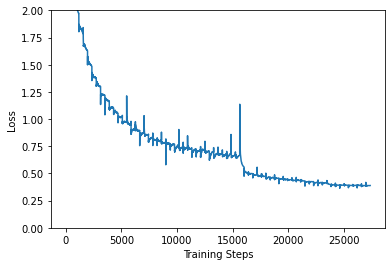

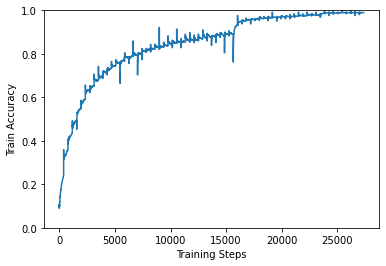

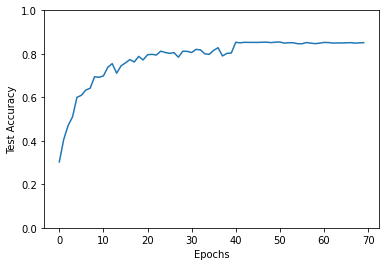

In [ ]:
# Residual network with weight decay
input = keras.layers.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(input)
x = keras.layers.ReLU()(x)
skip=x
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.AveragePooling2D(pool_size=(8, 8))(x)
x = keras.layers.Flatten()(x)
output = keras.layers.Dense(10, activation=tf.nn.softmax, kernel_regularizer=keras.regularizers.l2(0.001))(x)

resnet_with_weight_decay_model = keras.models.Model(input, output)
resnet_with_weight_decay_model.summary()

resnet_with_weight_decay_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                      loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

resnet_with_weight_decay_batch_stats = CollectBatchStats()

resnet_with_weight_decay_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=70,
              callbacks=[resnet_with_weight_decay_batch_stats, tf.keras.callbacks.LearningRateScheduler(scheduler)],
              validation_data=(test_images, test_labels))

plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(resnet_with_weight_decay_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Train Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(resnet_with_weight_decay_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(resnet_with_weight_decay_batch_stats.epoch_val_acc)

resnet_with_weight_decay_test_loss, resnet_with_weight_decay_test_acc = resnet_with_weight_decay_model.evaluate(test_images, test_labels)
print('Resnet test accuracy : ' + str(resnet_with_weight_decay_test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.9078 - accuracy: 0.8514
resnet test accuracy : 0.8317999839782715
resnet with weight decay test accuracy : 0.8514000177383423


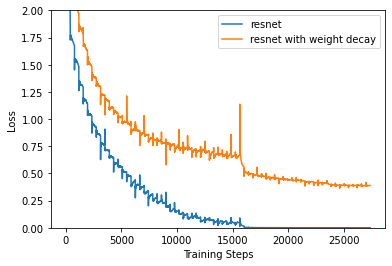

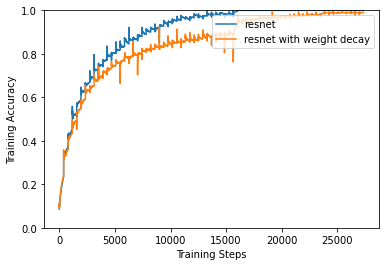

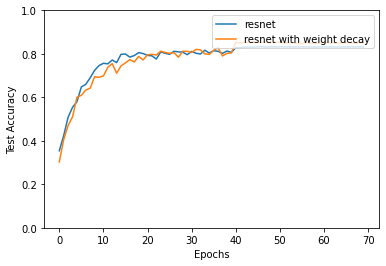

In [ ]:
# Compare Residual network and Residual network with weight decay
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(resnet_batch_stats.batch_losses, label='resnet')
plt.plot(resnet_with_weight_decay_batch_stats.batch_losses, label='resnet with weight decay')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(resnet_batch_stats.batch_acc, label='resnet')
plt.plot(resnet_with_weight_decay_batch_stats.batch_acc, label='resnet with weight decay')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(resnet_batch_stats.epoch_val_acc, label='resnet')
plt.plot(resnet_with_weight_decay_batch_stats.epoch_val_acc, label='resnet with weight decay')
plt.legend(loc='upper right')

resnet_test_loss, resnet_test_acc = resnet_model.evaluate(test_images, test_labels)
resnet_with_weight_decay_test_loss, resnet_with_weight_decay_test_acc = resnet_with_weight_decay_model.evaluate(test_images, test_labels)

print('resnet test accuracy : ' + str(resnet_test_acc))
print('resnet with weight decay test accuracy : ' + str(resnet_with_weight_decay_test_acc))

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_67 (Conv2D)              (None, 32, 32, 32)   896         input_4[0][0]                    
__________________________________________________________________________________________________
re_lu_63 (ReLU)                 (None, 32, 32, 32)   0           conv2d_67[0][0]                  
__________________________________________________________________________________________________
conv2d_68 (Conv2D)              (None, 32, 32, 32)   9248        re_lu_63[0][0]                   
____________________________________________________________________________________________

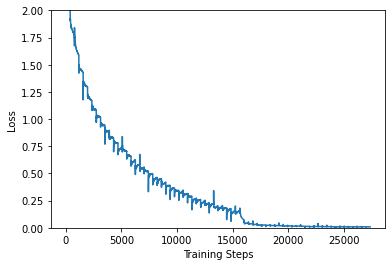

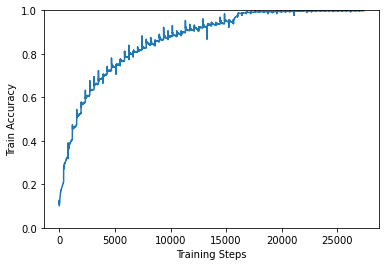

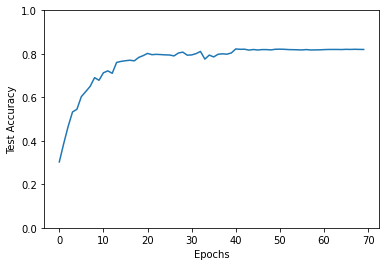

In [ ]:
# Residual network with dropout
input = keras.layers.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1))(input)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.AveragePooling2D(pool_size=(8, 8))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(rate=0.5)(x)
output = keras.layers.Dense(10, activation=tf.nn.softmax)(x)

resnet_dropout_model = keras.models.Model(input, output)
resnet_dropout_model.summary()

resnet_dropout_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

resnet_dropout_batch_stats = CollectBatchStats()

resnet_dropout_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=70,
              callbacks=[resnet_dropout_batch_stats, tf.keras.callbacks.LearningRateScheduler(scheduler)],
              validation_data=(test_images, test_labels))

plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(resnet_dropout_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Train Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(resnet_dropout_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(resnet_dropout_batch_stats.epoch_val_acc)

resnet_dropout_test_loss, resnet_dropout_test_acc = resnet_dropout_model.evaluate(test_images, test_labels)
print('Resnet with dropout test accuracy : ' + str(resnet_dropout_test_acc))

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_76 (Conv2D)              (None, 32, 32, 32)   896         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_18 (BatchNo (None, 32, 32, 32)   128         conv2d_76[0][0]                  
__________________________________________________________________________________________________
re_lu_72 (ReLU)                 (None, 32, 32, 32)   0           batch_normalization_18[0][0]     
____________________________________________________________________________________________

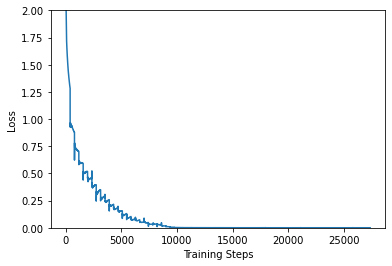

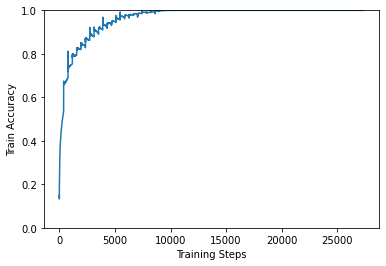

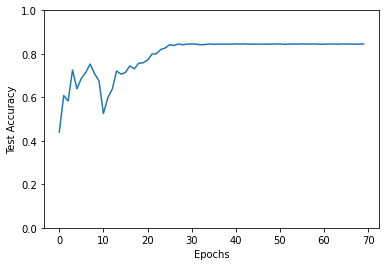

In [ ]:
# Residual network with batch normalization
input = keras.layers.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1))(input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.AveragePooling2D(pool_size=(8, 8))(x)
x = keras.layers.Flatten()(x)
output = keras.layers.Dense(10, activation=tf.nn.softmax)(x)

resnet_bn_model = keras.models.Model(input, output)
resnet_bn_model.summary()

resnet_bn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

resnet_bn_batch_stats = CollectBatchStats()

resnet_bn_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=70,
              callbacks=[resnet_bn_batch_stats, tf.keras.callbacks.LearningRateScheduler(scheduler)],
              validation_data=(test_images, test_labels))

plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(resnet_bn_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Train Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(resnet_bn_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(resnet_bn_batch_stats.epoch_val_acc)

resnet_bn_test_loss, resnet_bn_test_acc = resnet_bn_model.evaluate(test_images, test_labels)
print('Resnet with BN test accuracy : ' + str(resnet_bn_test_acc))

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_84 (Conv2D)              (None, 32, 32, 32)   896         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_26 (BatchNo (None, 32, 32, 32)   128         conv2d_84[0][0]                  
__________________________________________________________________________________________________
re_lu_80 (ReLU)                 (None, 32, 32, 32)   0           batch_normalization_26[0][0]     
____________________________________________________________________________________________

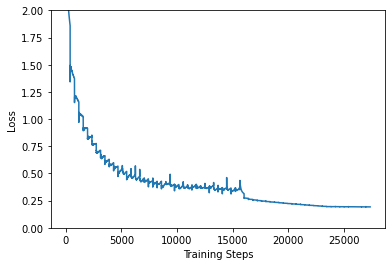

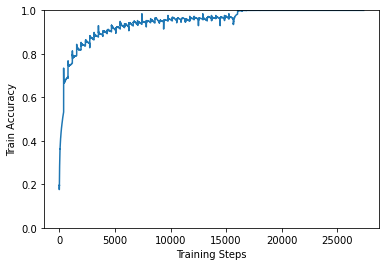

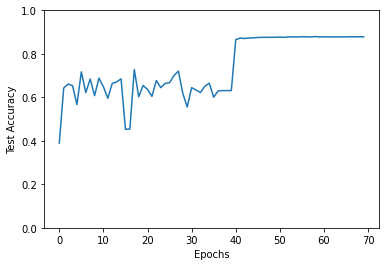

In [ ]:
# Residual network with batch normalization and weight decay
input = keras.layers.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
skip=x
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(32, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(64, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
skip = x
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(128, kernel_size=3, padding='same', strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Add()([x, skip])
x = keras.layers.ReLU()(x)
x = keras.layers.AveragePooling2D(pool_size=(8, 8))(x)
x = keras.layers.Flatten()(x)
output = keras.layers.Dense(10, activation=tf.nn.softmax, kernel_regularizer=keras.regularizers.l2(0.001))(x)

resnet_bn_wd_model = keras.models.Model(input, output)
resnet_bn_wd_model.summary()

resnet_bn_wd_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
)

resnet_bn_wd_batch_stats = CollectBatchStats()

resnet_bn_wd_model.fit(train_images, train_labels,
              batch_size=128,
              epochs=70,
              callbacks=[resnet_bn_wd_batch_stats,  tf.keras.callbacks.LearningRateScheduler(scheduler)],
              validation_data=(test_images, test_labels))

plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(resnet_bn_wd_batch_stats.batch_losses)

plt.figure()
plt.ylabel("Train Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(resnet_bn_wd_batch_stats.batch_acc)

plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(resnet_bn_wd_batch_stats.epoch_val_acc)

resnet_bn_wd_test_loss, resnet_bn_wd_test_acc = resnet_bn_wd_model.evaluate(test_images, test_labels)
print('Resnet with BN  and weight decay test accuracy : ' + str(resnet_bn_wd_test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.5978 - accuracy: 0.8782
resnet test accuracy : 0.8317999839782715
resnet with bn test accuracy : 0.845300018787384


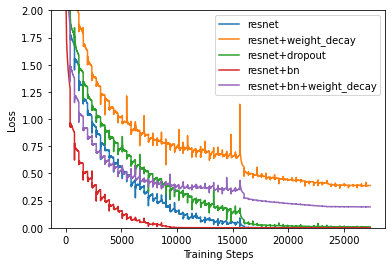

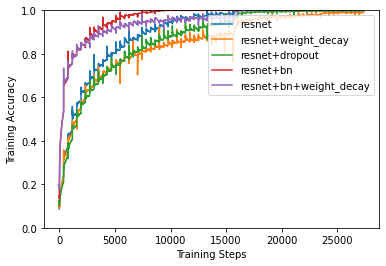

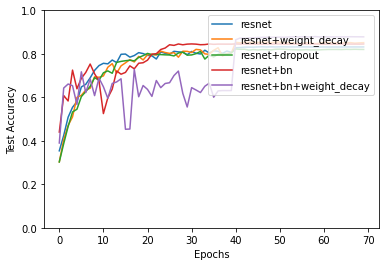

In [ ]:
# Compare residual network and residual network with batch normalization
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(resnet_batch_stats.batch_losses, label='resnet')
plt.plot(resnet_with_weight_decay_batch_stats.batch_losses, label='resnet+weight_decay')
plt.plot(resnet_dropout_batch_stats.batch_losses, label='resnet+dropout')
plt.plot(resnet_bn_batch_stats.batch_losses, label='resnet+bn')
plt.plot(resnet_bn_wd_batch_stats.batch_losses, label='resnet+bn+weight_decay')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Training Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(resnet_batch_stats.batch_acc, label='resnet')
plt.plot(resnet_with_weight_decay_batch_stats.batch_acc, label='resnet+weight_decay')
plt.plot(resnet_dropout_batch_stats.batch_acc, label='resnet+dropout')
plt.plot(resnet_bn_batch_stats.batch_acc, label='resnet+bn')
plt.plot(resnet_bn_wd_batch_stats.batch_acc, label='resnet+bn+weight_decay')
plt.legend(loc='upper right')


plt.figure()
plt.ylabel("Test Accuracy")
plt.xlabel("Epochs")
plt.ylim([0,1])
plt.plot(resnet_batch_stats.epoch_val_acc, label='resnet')
plt.plot(resnet_with_weight_decay_batch_stats.epoch_val_acc, label='resnet+weight_decay')
plt.plot(resnet_dropout_batch_stats.epoch_val_acc, label='resnet+dropout')
plt.plot(resnet_bn_batch_stats.epoch_val_acc, label='resnet+bn')
plt.plot(resnet_bn_wd_batch_stats.epoch_val_acc, label='resnet+bn+weight_decay')
plt.legend(loc='upper right')

resnet_test_loss, resnet_test_acc = resnet_model.evaluate(test_images, test_labels)
resnet_with_weight_decay_test_loss, resnet_with_weight_decay_test_acc = resnet_with_weight_decay_model.evaluate(test_images, test_labels)
resnet_dropout_test_loss, resnet_dropout_test_acc = resnet_dropout_model.evaluate(test_images, test_labels)
resnet_bn_test_loss, resnet_bn_test_acc = resnet_bn_model.evaluate(test_images, test_labels)
resnet_bn_wd_test_loss, resnet_bn_wd_test_acc = resnet_bn_wd_model.evaluate(test_images, test_labels)

print('resnet test accuracy : ' + str(resnet_test_acc))
print('resnet with bn test accuracy : ' + str(resnet_bn_test_acc))